In [98]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [99]:
cfg = get_dataset_cfg(WHARDatasetID.REAL_LIFE_HAR)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, True, True]

In [100]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-02-19 15:33:54,763 - whar-datasets - INFO - Running DownloadingStep
2026-02-19 15:33:54,764 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-02-19 15:33:54,766 - whar-datasets - INFO - Hash is up to date
2026-02-19 15:33:54,766 - whar-datasets - INFO - Running ParsingStep
2026-02-19 15:33:54,766 - whar-datasets - INFO - Checking hash for ParsingStep
2026-02-19 15:33:54,767 - whar-datasets - INFO - Hash is up to date
2026-02-19 15:33:54,767 - whar-datasets - INFO - Running WindowingStep
2026-02-19 15:33:54,767 - whar-datasets - INFO - Checking hash for WindowingStep
2026-02-19 15:33:54,769 - whar-datasets - INFO - Hash is up to date
2026-02-19 15:33:54,770 - whar-datasets - INFO - Loading windowing
2026-02-19 15:33:54,973 - whar-datasets - INFO - activity_ids from 0 to 3
2026-02-19 15:33:54,974 - whar-datasets - INFO - subject_ids from 0 to 16


In [101]:
splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
# splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

subject_0 354167 88541 934
subject_1 349790 87447 6405
subject_2 342872 85718 15052
subject_3 349342 87335 6965
subject_4 333489 83372 26781
subject_5 341697 85424 16521
subject_6 344672 86167 12803
subject_7 206435 51608 185599
subject_8 333806 83451 26385
subject_9 332812 83203 27627
subject_10 294820 73704 75118
subject_11 343520 85880 14242
subject_12 345880 86470 11292
subject_13 353408 88351 1883
subject_14 351281 87820 4541
subject_15 351892 87972 3778
subject_16 348741 87185 7716


In [102]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(False)

2026-02-19 15:33:55,975 - whar-datasets - INFO - Running SamplingStep
2026-02-19 15:33:55,986 - whar-datasets - INFO - Checking hash for SamplingStep
2026-02-19 15:33:55,997 - whar-datasets - INFO - Hash is up to date
2026-02-19 15:33:55,998 - whar-datasets - INFO - Loading samples


In [103]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)
print(len(loader))

443642


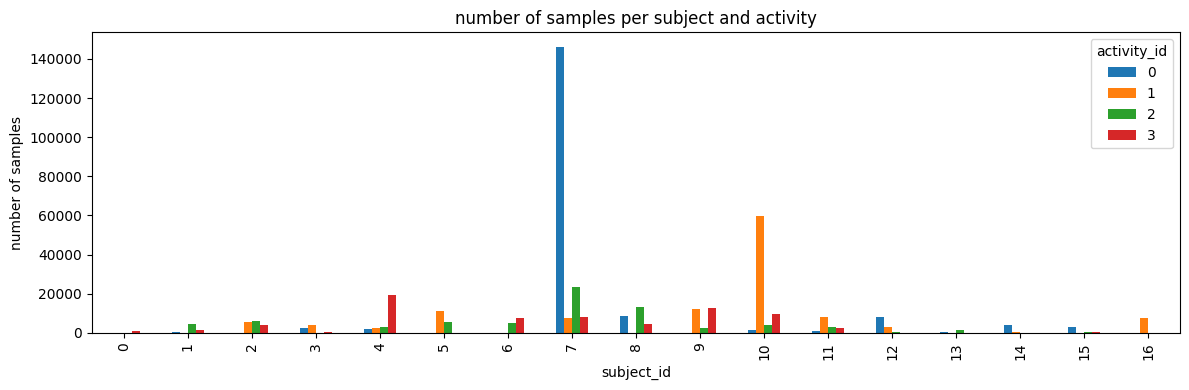

In [104]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: 3, Subject: 9')

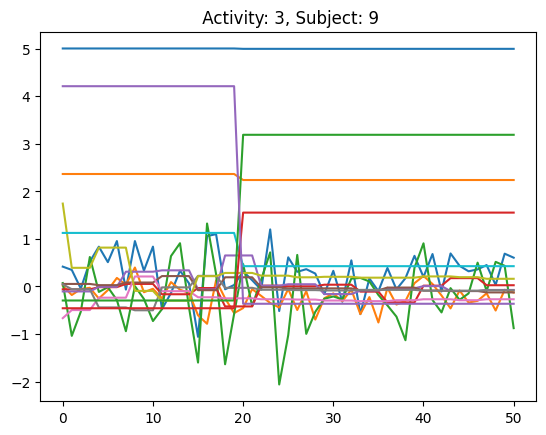

In [140]:
subject_id = None  # 2
activity_id = None  # 3

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")